In [1]:
from pathlib import Path
from typing import Tuple
import wfdb
import tqdm
import pandas as pd
import numpy as np
import ast
import src.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import takewhile

In [3]:
plt.rcParams['font.sans-serif']

['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

In [5]:
data, labels, sig_names = src.preprocessing.load_data('plt', 'lr')

100%|██████████| 21799/21799 [07:39<00:00, 47.42it/s]


{'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}


In [6]:
_, counts = np.unique(labels, return_counts=True)

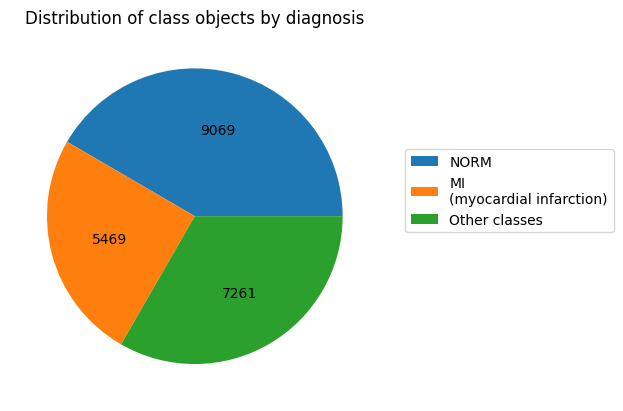

In [4]:
plt.pie(counts, autopct=lambda x: int(np.round(x / 100. *counts.sum(), 0)))
plt.title('Distribution of class objects by diagnosis', loc='center')

plt.legend(labels=['NORM', 'MI\n(myocardial infarction)', 'Other classes'], bbox_to_anchor=(1.05, 0.7))

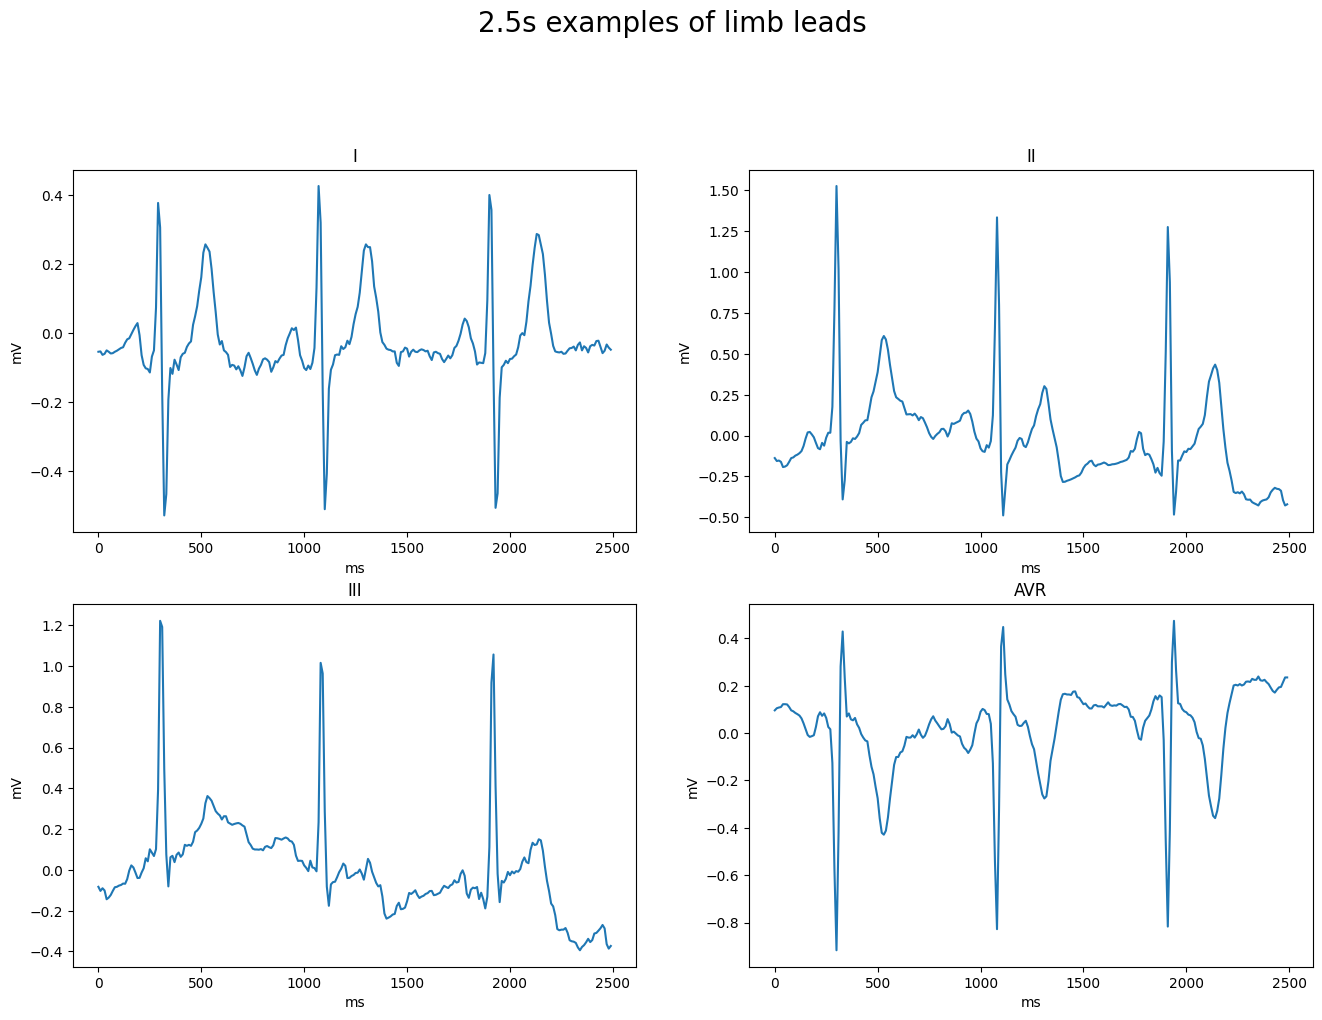

In [8]:
plt.figure(figsize=(16, 16))
plt.suptitle("2.5s examples of limb leads", fontsize=20)
for i in range(2):
    for j in range(2):
        ax = plt.subplot(3, 2, i * 2 + j + 1)
        ax.set_title(sig_names[i * 2 + j])
        ax.plot(np.array(range(250)) * 10, data[3][i * 2 + j][:250])
        ax.set_xlabel('ms')
        ax.set_ylabel('mV')

In [11]:
sig_names[8]

'V3'

In [26]:
stds = []
means = []
for i in range(len(data)):
    stds.append(np.std(data[i][8]))
    means.append(np.mean(data[i][8]))
stds.sort()

Text(0.5, 0, 'Mean (mV)')

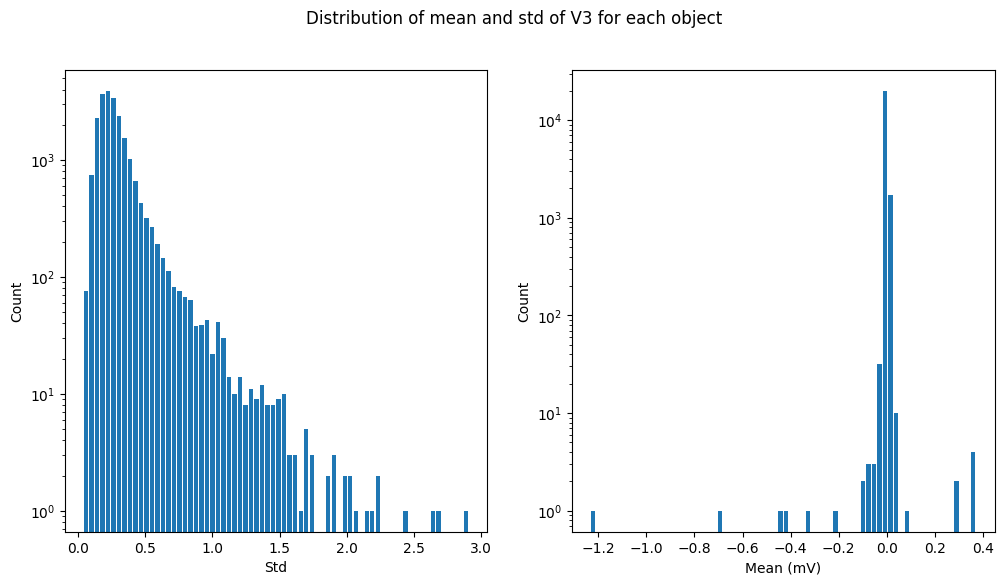

In [44]:
fig = plt.figure(figsize=(12, 6))
plt.suptitle('Distribution of mean and std of V3 for each object')
ax = plt.subplot(1, 2, 1)
ax.hist(stds, bins=70, log=True, rwidth=0.8)
ax.set_xlabel('Std')
ax.set_ylabel('Count')
ax
ax = plt.subplot(1, 2, 2)
ax.hist(means, bins=70, log=True, rwidth=0.8)
ax.set_ylabel('Count')
ax.set_xlabel('Mean (mV)')

Text(0.5, 0, 'std')

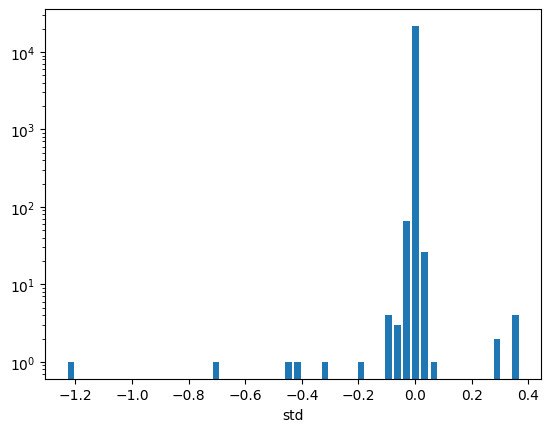

<AxesSubplot: >

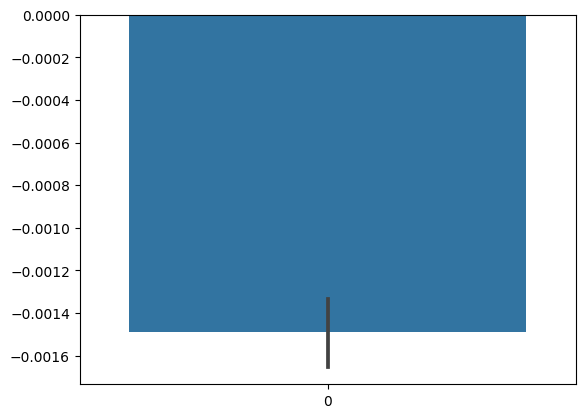

In [31]:
sns.barplot(means)

4996


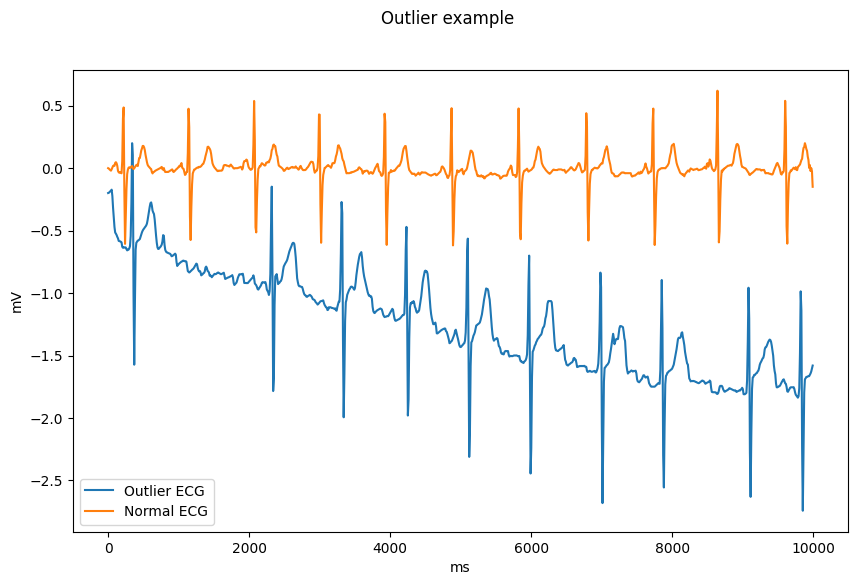

In [74]:
count = 0
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
plt.suptitle("Outlier example")
for i, mean in enumerate(means):
    if count != 1 and abs(mean) > 0.3:
        plt.plot(np.array(range(1000)) * 10, data[i][8])
        print(i)
        count += 1
ax.plot(np.array(range(1000)) * 10, data[0][8])
ax.set_xlabel('ms')
ax.set_ylabel('mV')
ax.legend(labels=['Outlier ECG', 'Normal ECG'])

In [2]:
pdata, plabels = src.preprocessing.preprocess_data('plt')

Loading data


100%|██████████| 21799/21799 [03:51<00:00, 94.14it/s] 


Dropping other
Filtering outliers


100%|██████████| 14538/14538 [00:19<00:00, 739.90it/s]


Applying moving average


100%|██████████| 13792/13792 [01:51<00:00, 123.20it/s]


Train-test split


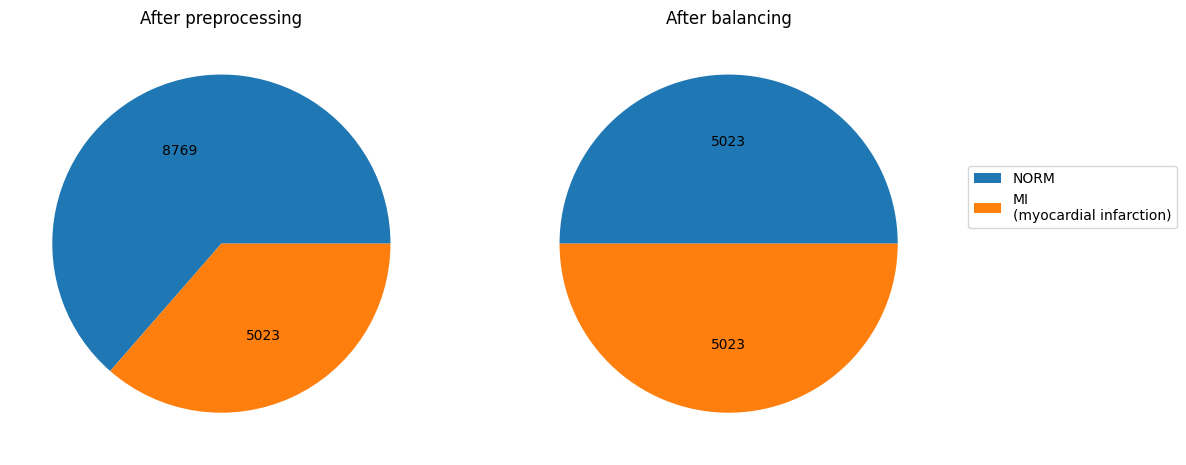

In [13]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 2, 1)
disb_counts = np.unique(plabels, return_counts=True)[1]
ax.pie(
    disb_counts,
    autopct=lambda x: int(np.round(x / 100. * disb_counts.sum(), 0))
)
ax.set_title("After preprocessing")
bal_counts = np.array([np.min(np.unique(plabels, return_counts=True)[1])] * 2)
ax = plt.subplot(1, 2, 2)
ax.pie(
    bal_counts,
    autopct=lambda x: int(np.round(x / 100. *bal_counts.sum(), 0))
)
ax.set_title("After balancing")
ax.legend(labels=['NORM', 'MI\n(myocardial infarction)', 'Other classes'], bbox_to_anchor=(1.05, 0.7))